In [27]:
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
import os 
import pandas as pd
import mplcursors
import pyperclip

# Script created by Rachel Sun 
# Last modified: 2021-08-10
# This script plots and extracts bandgap data from the dispersion relation of a Bloch Wave Analysis simulation.

In [28]:

######## DEFINE FUNCTIONS ########
def findBandGaps(freqs): 
    # function that finds bandgaps from a list of frequencies in a dispersion relation 
    # remove duplicate frequencies
    freqs = list(set(freqs))
    # sort frequencies from small to large
    freqs.sort() 

    # find bandgaps based on a set minimum width 
    BGW = 0.1 # bandgap width in MHz
    bandgaps = [] # list to store bandgap information
    for freqInd, freq in enumerate(freqs[0:-1]):
        if abs(freqs[freqInd] - freqs[freqInd+1]) > BGW:
            bandgapWidth = abs(freqs[freqInd] - freqs[freqInd+1])
            bandgapCenter = (freqs[freqInd] + freqs[freqInd+1])/2 
            bandgaps.append([freqs[freqInd+1], freqs[freqInd], bandgapWidth, bandgapCenter]) # append bandgap information to list
    return bandgaps

def extractlist(myList): 
    # converts a list of lists into a list of values
    newlist = []
    for item in myList: 
        value = item[0]*1e-6
        newlist.append(value)
    return newlist


Bandgaps: BC5p37CenM19p9CorM19p8
[0.15064, 6.6038e-05, 0.150573962, 0.075353019]
[0.41978, 0.31157999999999997, 0.10820000000000002, 0.36568]
[0.7488, 0.63972, 0.10908000000000007, 0.69426]
[1.4353, 1.3296999999999999, 0.10560000000000014, 1.3824999999999998]
[9.3124, 8.397499999999999, 0.9149000000000012, 8.854949999999999]
[16.136, 16.035, 0.10099999999999909, 16.0855]
[0.150573962, 0.075353019, 0.10820000000000002, 0.36568, 0.10908000000000007, 0.69426, 0.10560000000000014, 1.3824999999999998, 0.9149000000000012, 8.854949999999999, 0.10099999999999909, 16.0855]


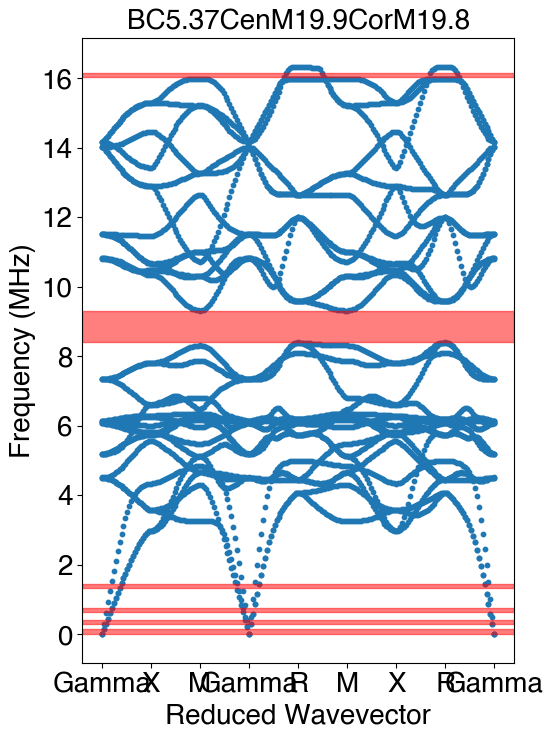

Bandgaps: BC6p15
[0.15997, 3.0981e-05, 0.159939019, 0.08000049050000001]
[0.44550999999999996, 0.33251, 0.11299999999999999, 0.38900999999999997]
[0.79343, 0.6778299999999999, 0.11560000000000004, 0.73563]
[1.2343, 1.1260999999999999, 0.10820000000000007, 1.1802]
[1.5229, 1.4009, 0.12199999999999989, 1.4619]
[1.9304999999999999, 1.8273, 0.10319999999999996, 1.8788999999999998]
[7.2592, 7.0268999999999995, 0.2323000000000004, 7.14305]
[9.5593, 9.2301, 0.32920000000000016, 9.3947]
[0.159939019, 0.08000049050000001, 0.11299999999999999, 0.38900999999999997, 0.11560000000000004, 0.73563, 0.10820000000000007, 1.1802, 0.12199999999999989, 1.4619, 0.10319999999999996, 1.8788999999999998, 0.2323000000000004, 7.14305, 0.32920000000000016, 9.3947]


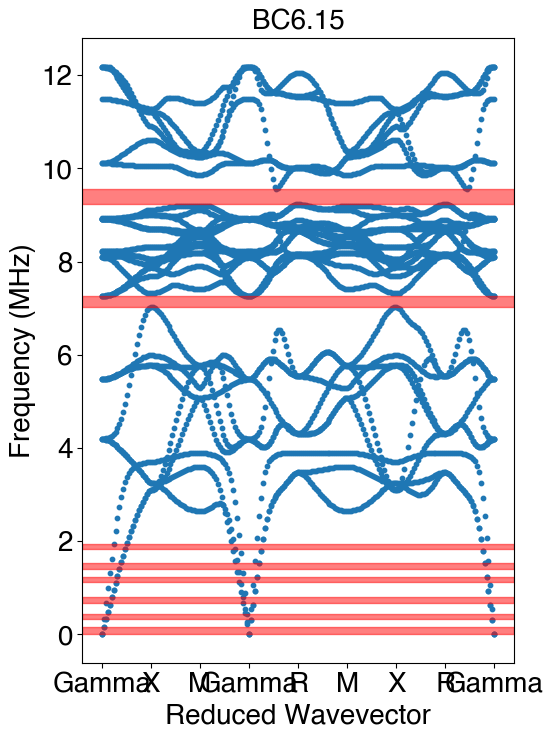

Bandgaps: BC5p91CenM17p1CorM18p9
[0.15192, 3.4258e-05, 0.151885742, 0.075977129]
[0.41495, 0.30745, 0.10749999999999998, 0.36119999999999997]
[0.74891, 0.6444599999999999, 0.10445000000000004, 0.696685]
[1.6172, 1.5115999999999998, 0.10560000000000014, 1.5644]
[0.151885742, 0.075977129, 0.10749999999999998, 0.36119999999999997, 0.10445000000000004, 0.696685, 0.10560000000000014, 1.5644]


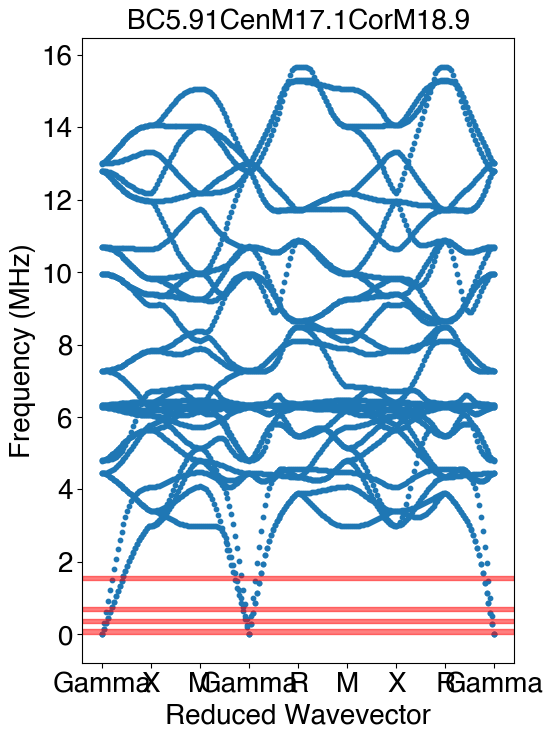

In [29]:

######## MAIN SCRIPT ########
directory = 'TBD5' # set directory to folder containing dispersion relation data 
fileInd = 0 # index for each file
for filename in os.listdir(directory): # loop through each file in directory
    fileID = filename[0:-5] # extract file ID from filename
    if filename.endswith(".xlsx"): # only process excel files
        file = os.path.join(directory, filename) # create path to file
        wavenum = pd.read_excel(file, sheet_name='Sheet1', usecols=[0]) # extract wavenumbers
        realfreqs = pd.read_excel(file, sheet_name='Sheet1', usecols=[2]) # extract real-valued frequencies
        usablefreqs = extractlist(realfreqs.values.tolist()) # convert frequencies to list

        # find bandgaps
        extractedBGs = findBandGaps(usablefreqs)

        # plot dispersion relation
        # plt.figure(fileInd)
        plt.rcParams["figure.figsize"] = [5.50, 7.50] # set figure size
        plt.rcParams["figure.autolayout"] = True # fit plot to window
        fig, ax = plt.subplots(figsize=figaspect(4/3))
        plt.scatter(wavenum, realfreqs*1e-6, s=10) 

        # plot bandgaps
        print('Bandgaps: ' + fileID) 
        BGInfo = [] # list to store bandgap width and center
        for BG in extractedBGs: 
            print(BG)
            plt.axhspan(BG[0], BG[1], alpha=0.5, color='red') # plot bandgap as shaded rectangle
            BGInfo.append(BG[2]) # append bandgap width to list
            BGInfo.append(BG[3]) # append bandgap center to list
        print(BGInfo)

        # plot formatting
        csfont = {'fontname':'Helvetica', 'fontsize': 20} # set font
        plt.title(fileID.replace('p','.'), **csfont) # set title
        plt.yticks(**csfont) # set y-axis ticks
        plt.xlabel('Reduced Wavevector', **csfont) # set x-axis label
        plt.ylabel('Frequency (MHz)', **csfont) # set y-axis label
        fig.canvas.draw() # draw figure
        labels = ['Gamma', 'X', 'M', 'Gamma','R','M','X','R','Gamma'] # name x-axis tick labels
        ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8]) # set x-axis ticks
        ax.set_xticklabels(labels, **csfont) # set x-axis tick labels


        # uncomment for interactive plot values upon hover 
        cursor = mplcursors.cursor(hover=True)
        plt.show(block=True)
        pyperclip.copy(str(BGInfo)) # copy bandgap width and center to clipboard
        ########

        # uncomment for fast processing 
        # plt.show(block=False)
        # # save plot for viewing later 
        # plt.savefig(fileID + '.png')
        ########
    fileInd += 1 
